In [1]:
import numpy as np
import matplotlib.pyplot as plt

def GSAMPLE(mu,sigma, n):
    dim = np.shape(mu)[0]

    dtemp,v = np.linalg.eig(sigma)
    d = np.sqrt(np.diag(dtemp))

    g = np.reshape(np.random.randn(n*dim),(dim,n))
    gstar = np.dot(v.dot(d),g) + mu
    gfinal = gstar.transpose()
    return (gfinal)
mu1 = np.reshape([1,1],(2,1))
sigma1 = [[2,1],[1,2]]
test = GSAMPLE(mu1,sigma1,999)
print('the shape of sample is: ',test.shape)

the shape of sample is:  (999, 2)


In [2]:
mu2 = np.reshape([2,3],(2,1))
sigma2 = [[3,2],[2,3]]
test2 = GSAMPLE(mu2,sigma2,999)
print('the shape of sample is: ',test2.shape)
print('mu = ',[np.mean(test2[:,0]),np.mean(test2[:,1])])
print('sigma = \n',np.cov(test2.transpose()))

the shape of sample is:  (999, 2)
mu =  [1.9420213122869219, 2.9140952128320641]
sigma = 
 [[ 2.94738064  1.95248897]
 [ 1.95248897  2.90522692]]


the shape of sample is:  (100, 2)
mu =  [0.85739871629945763, 1.0725911584289045]
sigma = 
 [[ 2.0627137   0.90062009]
 [ 0.90062009  1.91734784]]


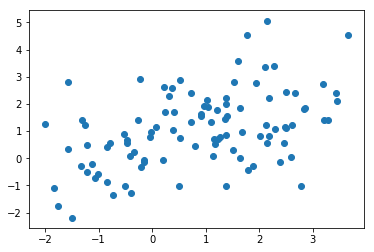

In [3]:
mu3 = np.reshape([1,1],(2,1))
sigma3 = [[2,1],[1,2]]
n=100
test = GSAMPLE(mu3,sigma3,n)
print('the shape of sample is: ',test.shape)
print('mu = ',[np.mean(test[:,0]),np.mean(test[:,1])])
print('sigma = \n',np.cov(test.transpose()))
import matplotlib.pyplot as plt
plt.scatter(test[:,0],test[:,1])
plt.show()

the shape of sample is:  (100, 3)
mu =  [0.79003224470040334, 1.0099721110702182]
sigma = 
 [[ 5.37239223  1.84430116 -0.09934151]
 [ 1.84430116  2.99594885  1.02232762]
 [-0.09934151  1.02232762  1.10118738]]


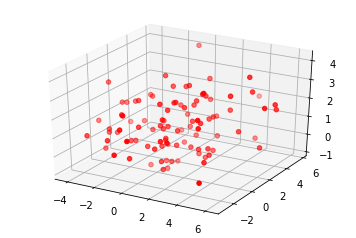

In [4]:
mu4 = np.reshape([1,1,1],(3,1))
sigma4 = [[5,2,0],[2,3,1],[0,1,1]]
n=100
test = GSAMPLE(mu4,sigma4,n)
print('the shape of sample is: ',test.shape)
print('mu = ',[np.mean(test[:,0]),np.mean(test[:,1])])
print('sigma = \n',np.cov(test.transpose()))
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(test[:,0],test[:,1],test[:,2],c='r',marker='o')
plt.show()

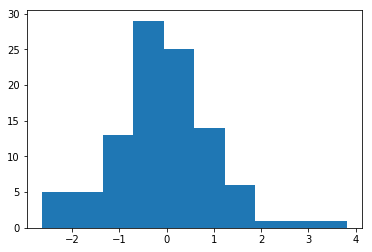

In [5]:
n = 100
N = 10
s = np.random.randn(n)
plt.hist(s,bins=N)
plt.show()

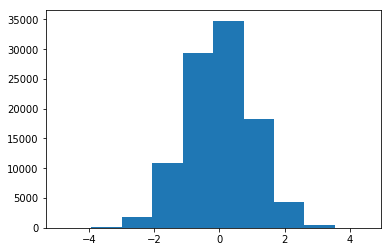

In [6]:
n = 100000
N = 10
s = np.random.randn(n)
plt.hist(s,bins=N)
plt.show()

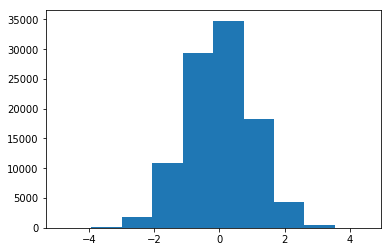

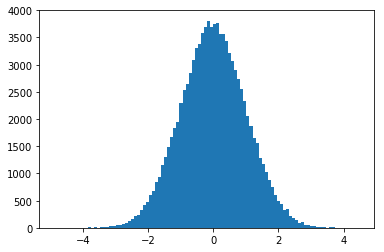

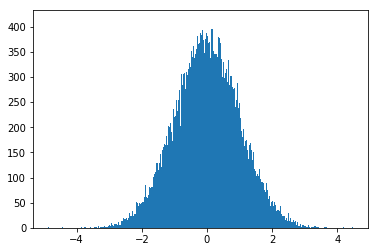

In [7]:
N = [10,100,1000]
plt.figure(1)
plt.subplot(111)
plt.hist(s,N[0])
plt.figure(2)
plt.subplot(111)
plt.hist(s,N[1])
plt.figure(3)
plt.subplot(111)
plt.hist(s,N[2])
plt.show()

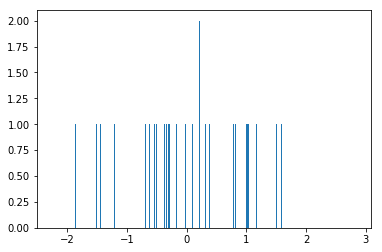

In [8]:
n = 100
N = 1000
s = np.random.randn(n)
plt.hist(s,bins=N)
plt.show()

Larger sample produces higher reliability of estimates. With fixed number of sample, more $N_{bins}$ will produce smoother plot. however, if $N_{bins}$ is too large for the sample size, it will produce meaningless plot like plot in d).


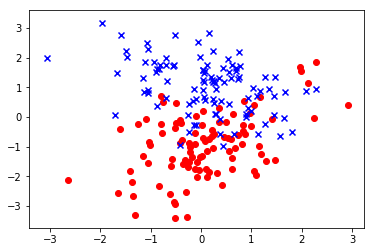

In [9]:
s0 = np.random.multivariate_normal([0,-1],[[1,0.5],[0.5,1]],100)

s1 = np.random.multivariate_normal([0,1],[[1,-0.5],[-0.5,1]],100)
y0 = np.array([0]*100)
y1 = np.array([1]*100)
X = np.vstack((s0,s1))
Y = np.append(y0,y1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(s0[:,0],s0[:,1],c='r',marker='o')
ax.scatter(s1[:,0],s1[:,1],c='b',marker='x')
plt.show()

In [10]:
import scipy.special
def loss(X,y,w):
    sig = scipy.special.expit(np.dot(w,X.transpose()))
    return(-np.sum(y * np.log(sig) + (1-y)*np.log(1-sig)))

def grad(X,y,w):
    return(np.sum(X.transpose() * (scipy.special.expit(np.dot(w,X.transpose()))-y)))
w = np.array([0,0])
print(grad(X,Y,w))

-101.162641804


In [11]:
w = np.array([0,0])
loss1 = loss(X,Y,w)
loss2 = loss(X,Y,w)
dif = 1
w_old = w
i = 1

step  1  new loss:  129.167428978  difference:  9.46200713447
step  2  new loss:  122.318356469  difference:  6.8490725086
step  3  new loss:  117.28838815  difference:  5.0299683191
step  4  new loss:  113.522643723  difference:  3.76574442655
step  5  new loss:  110.64717022  difference:  2.87547350362
step  6  new loss:  108.410832375  difference:  2.23633784486
step  7  new loss:  106.642904413  difference:  1.76792796143
step  8  new loss:  105.225141182  difference:  1.41776323169
step  9  new loss:  104.073952945  difference:  1.15118823644
step  10  new loss:  103.12904637  difference:  0.94490657565
step  11  new loss:  102.34610192  difference:  0.782944449641
step  12  new loss:  101.691971959  difference:  0.654129961001
step  13  new loss:  101.14147137  difference:  0.550500589301
step  14  new loss:  100.675190996  difference:  0.466280373363
step  15  new loss:  100.277980092  difference:  0.397210904607
step  16  new loss:  99.9378745168  difference:  0.340105574842
st

In [12]:
while (dif > 0.001):
    loss1 = loss2
    w = w - 0.001*grad(X,Y,w)
    loss2 = loss(X,Y,w)
    dif = abs(loss2 - loss1)
    print('step ', i, ' new loss: ', loss2, ' difference: ',dif)
  
    i = i+1

step  1  new loss:  129.167428978  difference:  9.46200713447
step  2  new loss:  122.318356469  difference:  6.8490725086
step  3  new loss:  117.28838815  difference:  5.0299683191
step  4  new loss:  113.522643723  difference:  3.76574442655
step  5  new loss:  110.64717022  difference:  2.87547350362
step  6  new loss:  108.410832375  difference:  2.23633784486
step  7  new loss:  106.642904413  difference:  1.76792796143
step  8  new loss:  105.225141182  difference:  1.41776323169
step  9  new loss:  104.073952945  difference:  1.15118823644
step  10  new loss:  103.12904637  difference:  0.94490657565
step  11  new loss:  102.34610192  difference:  0.782944449641
step  12  new loss:  101.691971959  difference:  0.654129961001
step  13  new loss:  101.14147137  difference:  0.550500589301
step  14  new loss:  100.675190996  difference:  0.466280373363
step  15  new loss:  100.277980092  difference:  0.397210904607
step  16  new loss:  99.9378745168  difference:  0.340105574842
st

In [13]:
print(w)

[ 0.99645452  0.99645452]
